# LeetCode 1.Two Sum

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

=> 주어진 배열에 있는 두 원소를 더해 target 값을 항상 만들 수 있을 때 그 두 개의 원소의 index를 반환하라

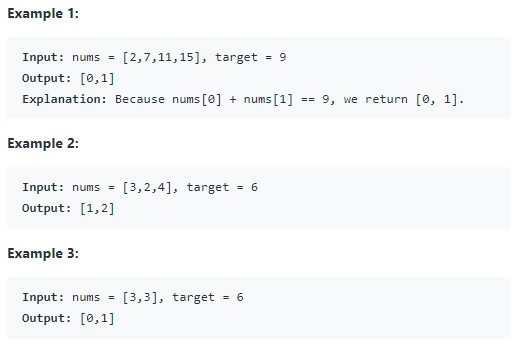

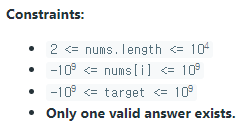

**(POINT) nums라는 배열과 target이라는 값을 인자로 받고 nums의 i번째 값과 j번째 값의 합이 target 값과 같을시 [i,j]을 리턴하는 함수를 만들라**

## Solutions

- (보통 많이 떠올리는 방법) 첫번째 인덱스와 뒤에있는 나머지 인덱스와 더해보고 두번째 인덱스와 그 뒤에 있는 인덱스와 더해보는 방법
- Brute Force
- hash table

### Brute Force, 브루트 포스

 - 문제를 해결하기 위해서 모든 자료를 탐색해야 하기 때문에 특정한 구조를 전체적으로 탐색할 수 있는 방법을 필요로 한다.

   - 알고리즘 설계의 가장 기본적인 접근 방법 : ***해가 존재할 것으로 예상되는 모든 영역을 전체 탐색하는 방법(완전 탐색 알고리즘)***

   - 선형 구조를 전체적으로 탐색하는 ***순차 탐색***, 비선형 구조를 전체적으로 탐색하는 ***깊이 우선 탐색(DFS, Depth First Search)***과 ***너비 우선 탐색(BFS, breadth first search)***이 가장 기본적인 도구

     *너비 우선 탐색은 브루트 포스와 관련이 깊다.

[ 너비 우선 탐색(BFS, Breadth-first search) ]

- 그래프에서 완전탐색 방법 중 하나

- 탐색트리의 루트노드부터 목표노드를 만날 때까지 단계별로 횡방향으로 탐색을 진행해 나가는 방식

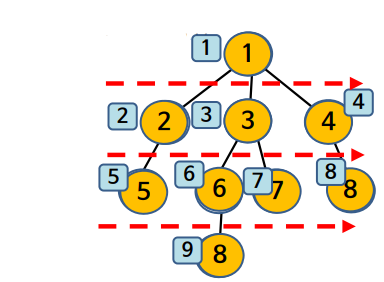

[ Brute Force(브루트 포스) ]

> 완전탐색 알고리즘

- 가능한 ***모든 경우의 수를 모두 탐색***하면서 요구 조건에 충족되는 결과만을 가져온다.
- 예외없이 100%의 확률로 정답만을 출력한다.

In [ ]:
# 2중 for문으로 하나하나 비교하여 target과 같아지는 순간 인덱스들을 출력
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]

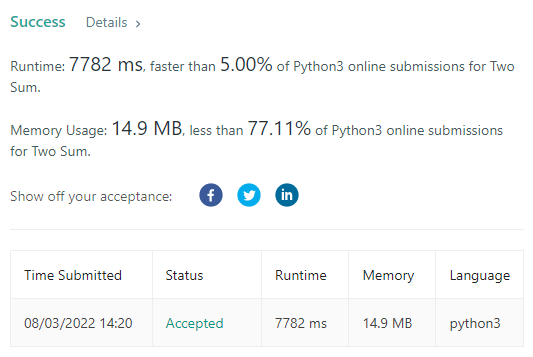

**(결론) 하나하나 다 넣어 비교하다보니 시간이 매우 오래 걸린다.**

### HashTable, 해시 테이블

[ HashTable(해시테이블) ]

> 해시함수를 사용하여 키를 해시값으로 매핑하고, 이 해시값을 색인(인덱스) 또는 주소삼아 데이터를 key와 함께 저장하는 자료구조

***(key - value)로 데이터를 저장***하는 자료구조

=> 기존 자료구조인 이진탐색트리나 배열에 비해 굉장히 ***빠른 속도로 탐색, 삽입, 삭제*** 가능 

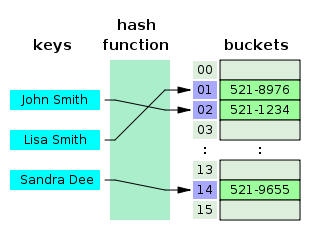

[ Hash 함수 (해시 함수)]

- key를 **고정된 길이**의 hash로 변경해주는 역할(**hashing**)

- 서로 다른 key가 hashing 후 같은 hash값이 나오는 경우가 있다. = 해시충돌 (* 해시 충돌 발생확률이 적을수록 좋다.)

=> key를 해시함수라는 함수에 Input으로 넣어서 Ouput으로 나오는 것이 Hash(해시)라고 생각하면 되고, 이 Hash(해시)가 저장위치가 된다고 생각하면 된다.


1. Direct Address Table


> 가장 간단한 형태의 해시테이블, 키 값을 주소로 사용하는 테이블

ex) 키 값이 21이라고 했을 때 배열의 인덱스 21에 원하는 데이터를 저장하는 것

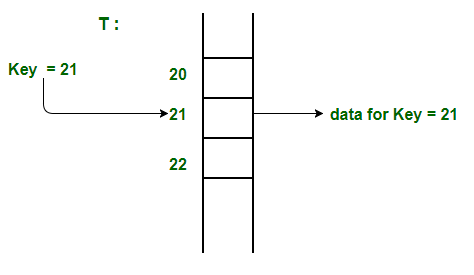

장점

- 탐색,삽입,삭제 연산을 모두 O(1) 에 할 수 있다.

한계점

- 최대 키 값에 대해 알고 있어야 한다.
- 최대 키 값이 작을 때 실용적으로 사용할 수 있다.
- 키 값들이 골고루 분포되어있지 않다면 메모리 낭비가 심할 수밖에 없다.

충돌을 이해하기 전 적재율을 먼저 이해하고 가실게요~!

[적재율(Load Factor)]

> 해시 테이블의 크기 대비, 키의 개수

키의 개수를 K, 해시 테이블의 크기를 N => 적재율은 K/N


Q. Direct Address Table의 적재율은? => A. 1 이하

WHY? 키 값을 인덱스로 사용하는 구조 

적재율이 1 초과인 해시 테이블의 경우는 반드시 충돌이 발생하게 된다.

충돌이 발생하지 않다고 할 경우
- 해시 테이블의 탐색, 삽입, 삭제 연산은 모두 O(1) 에 수행

충돌이 발생할 경우
- 탐색과 삭제 연산이 최악에 O(K) 만큼 걸리게 된다.

=> 이는 같은 인덱스에 모든 키 값과 데이터가 저장된 경우(충돌이 전부 발생했음)

[ 해시(Hash) 충돌]

"만약 "John Smith"를 해시 함수를 돌려 나온 값과 "Sandra Dee"를 해시 함수를 돌려 나온 값이 동일하다면 어떻게 해야 할까?" (중복된 인덱스 값이 생기는 경우)

해시 테이블의 POINT : 충돌을 최대한으로 줄여서 연산속도를 빠르게 하는 것

-> 해시함수를 구현하는 해시 알고리즘

=> 해시 알고리즘이 견고하지 못하게 되면 해시함수로 도출된 값들이 같은 경우가 빈번하게 발생하게 되므로 잦은 충돌로 이어지게 되는 것

해시 테이블의 중점사항 => ***충돌 완화***

- 해시 테이블의 구조 개선
- 해시 함수 개선

충돌해결 1 : 해시 테이블의 구조 개선

<해결 방법 1. 분리 연결법(Separate Chaining)>

> 충돌이 발생했을 때 이를 동일한 버킷(Bucket)에 저장하는데 이를 연결리스트 형태로 저장하는 방법

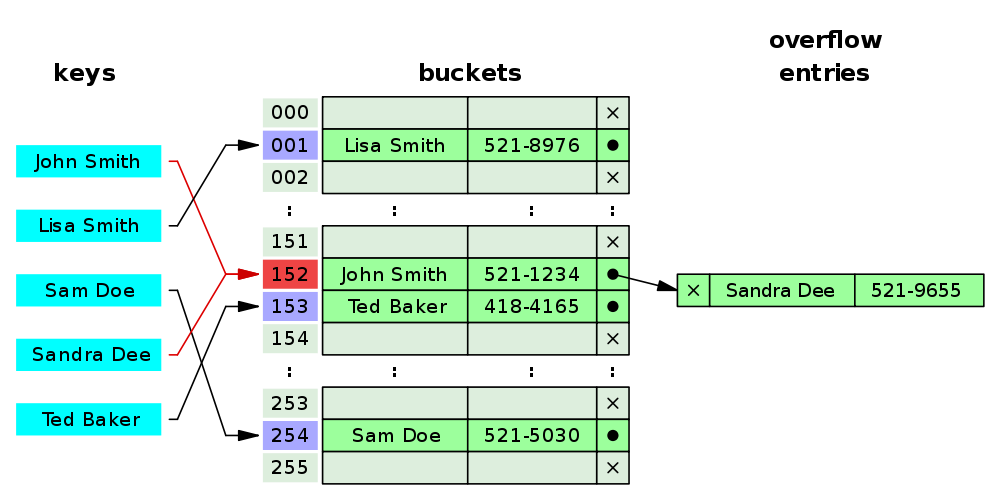

=> John Smith 와 Sandra Dee 의 인덱스가 152 로 충돌하게 된 경우로 Sandra Dee 를 John Smith 뒤에 연결함으로써 충돌 처리

시간복잡도

- 삽입 : 상수시간인 O(1) (Why? 연결리스트에 추가만 하면 되기 때문) 

- 탐색과 삭제
  - (최악) 키 값의 개수인 K 에 대해 O(K) (최악의 경우보다는 시간복잡도를 적재율을 이용해서 평균으로 표현)
  - (평균) O(α+1) (적재율 α를 K/N이라고 하면 해시 테이블 내에 공간 대비 키 값들이 얼마나 있느냐, 즉 충돌할 여지가 얼마나 있느냐라는 뜻)

장점

- 미리 충돌을 대비해서 공간을 많이 잡아놓을 필요가 없다. 충돌이 나면 그때 공간을 만들어서 연결만 해주면 된다.

단점

- 같은 hash에 자료들이 많이 연결되면 검색시 효율이 낮아진다.



<해결 방법 2. open addressing(개방 주소법)>

> 원래라면 해시함수로 얻은 해시값에 따라서 데이터와 키값을 저장하지만 동일한 주소에 다른 데이터가 있을 경우 다른 주소도 이용할 수 있게 하는 기법, 비어있는 해시 테이블의 공간을 활용하는 방법

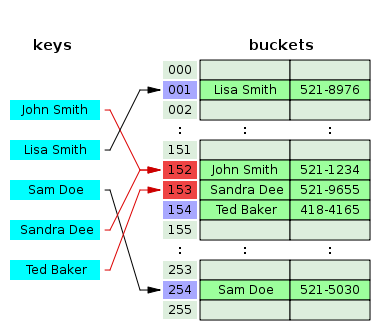

=> John Smith 와 Sandra Dee 의 인덱스가 152로 충돌하게 된 경우로 John Smith가 152, Sandra가 153에 저장되면서 Ted Baker가 다음 주소인 154에 저장

충돌해결 2 : 해시 함수 개선

1. 나눗셈법(Division Method)
- 아주 간단하게 해시값을 구하는 방법
- 미리 해시 테이블의 크기인 N을 아는 경우에 사용 가능
- 해시함수를 적용하고자 하는 값을 N으로 나눈 나머지를 해시값으로 사용하는 방법

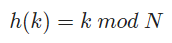

(N은 2의 제곱꼴을 사용하면 안된다고 하며 소수를 사용하는 것이 좋다.)

2. 곱셈법(Multiplication Method)

0<A<1 인 A

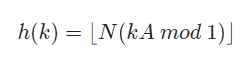

장점
- N 이 어떤 값이더라도 잘 동작

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        ##nums_dict 해시 테이블에 nums의 인덱스와 값을 저장
        nums_dict = {num: ind for ind, num in enumerate(nums)}
        ##nums_dict에서 원하는 요소 찾기
        for ind, num in enumerate(nums):
            if ((target - num) in nums_dict) and (ind != nums_dict[(target - num)]):
                return [ind, nums_dict[(target - num)]]

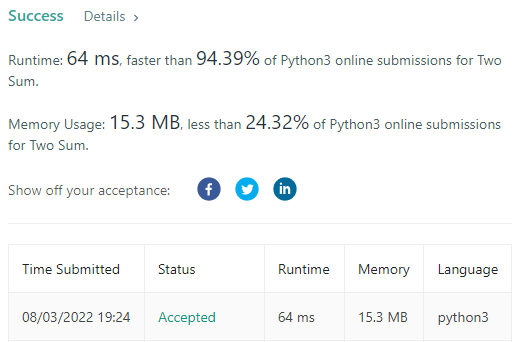

**(결론) 알고리즘 공부 열심히 해서 코딩하자~!~!!~!!**